# **Traffic Signs Project**





**Project Summary:**
Our project focuses on developing a real-time traffic sign detection system designed to accurately recognize various traffic signs, such as Stop, Speed Limit, and Yield. These signs are essential for ensuring road safety and assisting drivers in making informed decisions while driving.

Utilizing advanced deep learning algorithms and computer vision techniques, we train our model on annotated datasets containing images and videos of different traffic signs under varying conditions. The system’s architecture incorporates the YOLOv8 (You Only Look Once) model, which excels in both speed and accuracy for real-time object detection, making it highly suitable for this application.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*italicized text*#  2

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg

def visualize_photo(input_path, title = None):
    """
    Visualize a photo from the given input path with a shape of 400x400 pixels.

    Parameters:
        input_path (str): The path to the input photo file.
    """

    img = Image.open(input_path)


    img_resized = img.resize((640, 640))


    plt.figure(figsize=(8, 6))
    plt.imshow(img_resized)
    plt.axis('off')
    if title:
        plt.title(title)

    plt.show()

# **Data Preparing**

Preparing data for an object detection model involves several steps:
- **Data Collection**: Gather images or videos containing the objects of interest. These can be sourced from various sources such as online databases, cameras, or other sensors.

- **Annotation**: Mark the location and class of objects within the images or frames. This typically involves bounding box annotations to specify where each object is located and what category it belongs to.

- **Data Augmentation**: Enhance the dataset by applying transformations such as rotation, scaling, flipping, or changing brightness. This increases the diversity of the data and helps the model generalize better.

- **Data Splitting**: Divide the dataset into training, validation, and testing sets. The training set is used to train the model, the validation set is used to tune hyperparameters and prevent overfitting, and the testing set is used to evaluate the model's performance.

- **Data Preprocessing**: Resize images to a consistent size, normalize pixel values, and format the annotations into a suitable input format for the model.


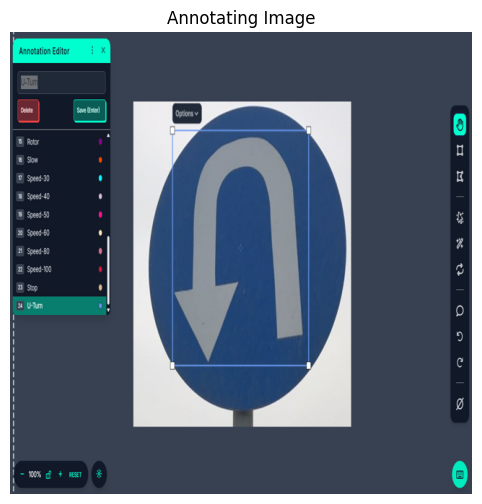

In [ ]:
input_path = "/content/drive/MyDrive/TRAFFIC SIGNS//Imgs/Ann.png"
visualize_photo(input_path, "Annotating Image")

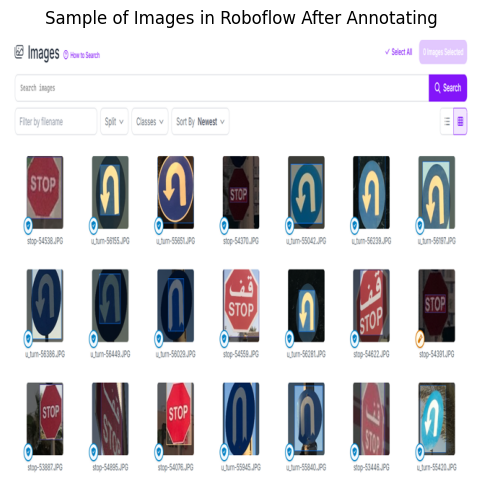

In [ ]:
input_path = "/content/drive/MyDrive/TRAFFIC SIGNS//Imgs/Samples.png"
visualize_photo(input_path, "Sample of Images in Roboflow After Annotating")

**b- Data Augmentation**: There is a built-in library in keras used to help you with data augmentation process and process images which is **ImageDataGenerator**, but we are going to use a simpler method with the aid of Roboflow.


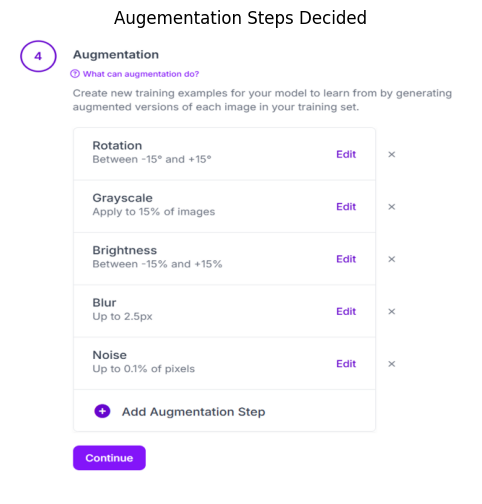

In [ ]:
input_path = "/content/drive/MyDrive/TRAFFIC SIGNS//Imgs/Aug.png"
visualize_photo(input_path, "Augementation Steps Decided")

**c- Data Splitting**: This is a very critical Steps to decide, Train and Validation set are the most important sets as they are related to getting weights of model, hence they got the most ratio with 90% Train, 7% Validation, 3% Test.

- After Augmenting Data we got 3760 Images

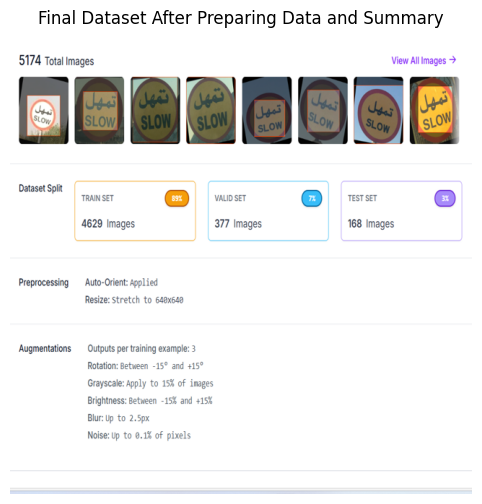

In [ ]:
input_path = "/content/drive/MyDrive/TRAFFIC SIGNS//Imgs//Final.png"
visualize_photo(input_path, "Final Dataset After Preparing Data and Summary")

# **Visualizing Sample of The Training Dataset**

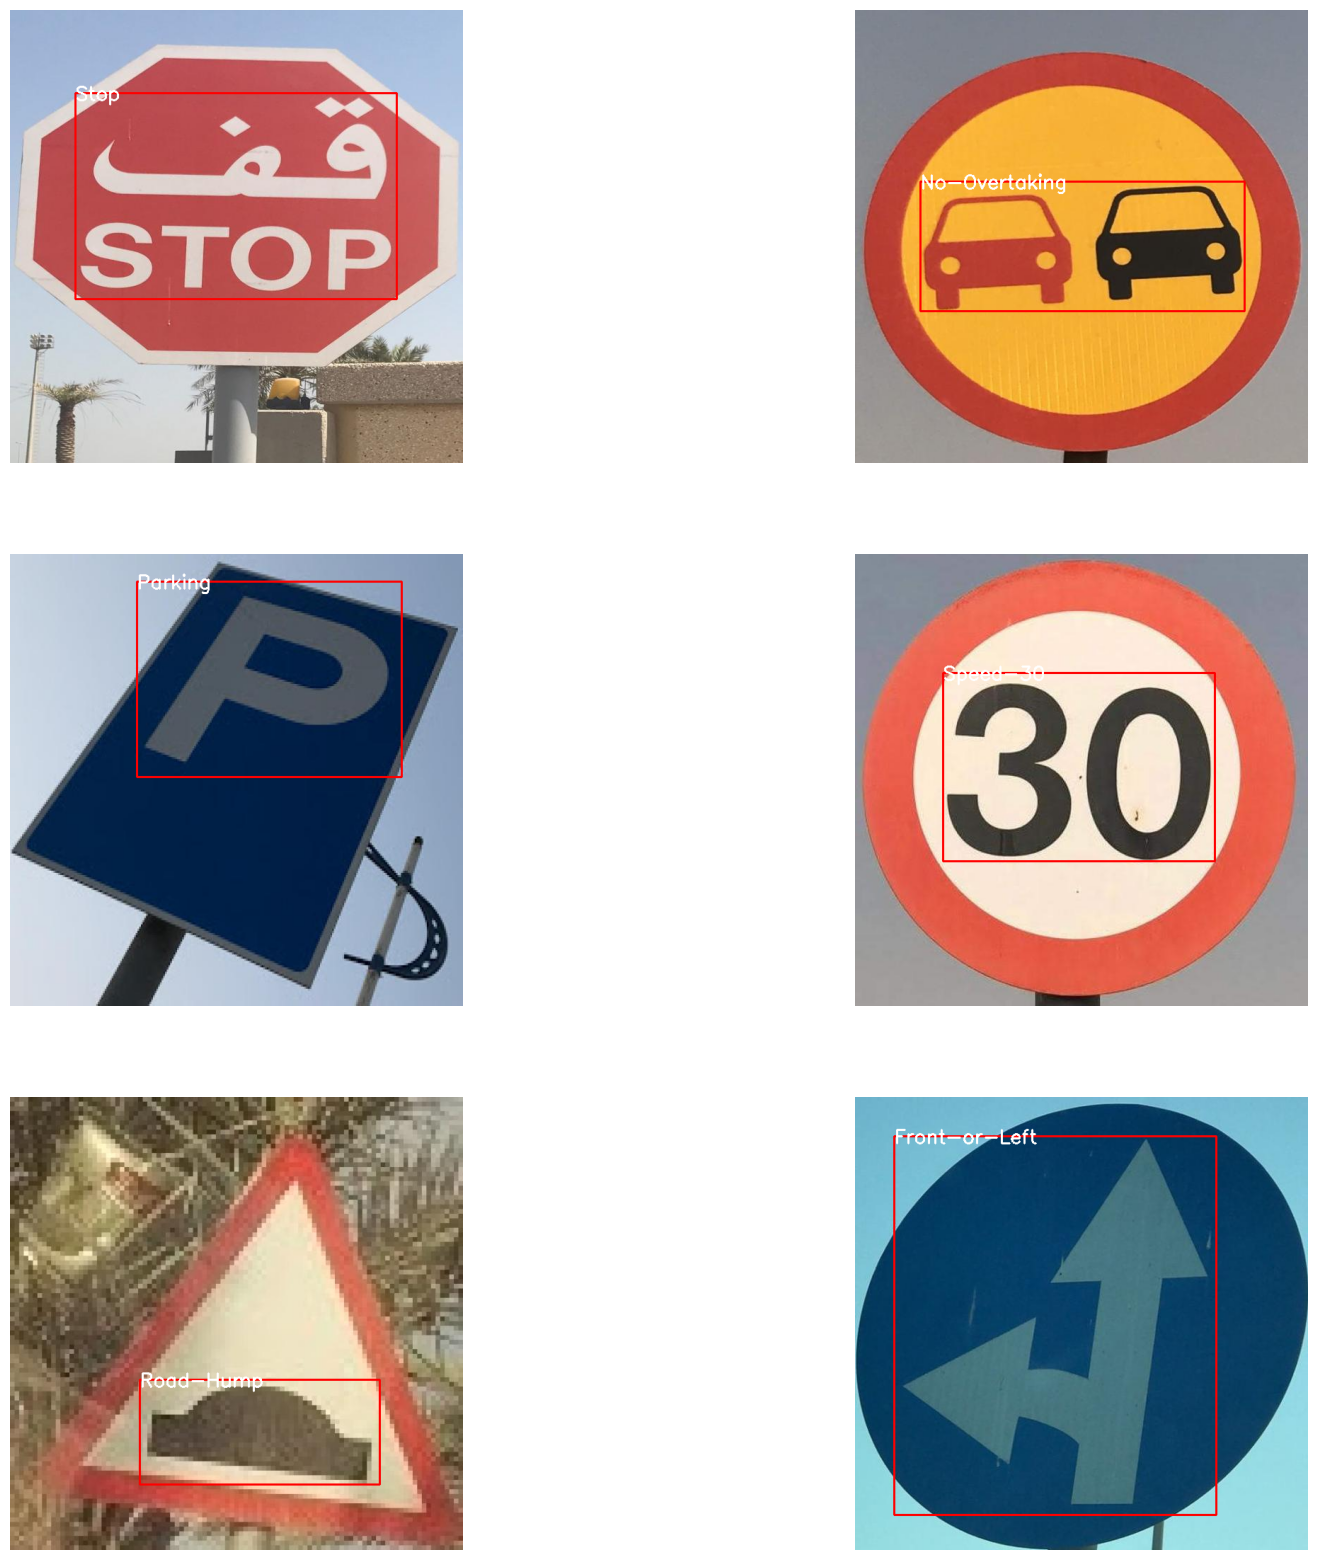

In [ ]:


import os
import random
import cv2
import matplotlib.pyplot as plt


dataset_path = '/content/drive/MyDrive/TRAFFIC SIGNS/Updated Dataset/valid'
images_path = os.path.join(dataset_path, 'images')
labels_path = os.path.join(dataset_path, 'labels')


class_names = ['Front-or-Left', 'Front-or-Right', 'Left-Turn', 'Narrow-From-Left', 'Narrow-From-Right', 'No-Horn'
,'No-Overtaking', 'No-Parking', 'No-U-Turn','Parking', 'Pedestrian-Crossing', 'Right-Turn', 'Right-or-Left', 'Road-Hump'
,'Rotor', 'Slow','Speed-100', 'Speed-30','Speed-40','Speed-50','Speed-60','Speed-80', 'Stop', 'U-Turn']


image_files = [f for f in os.listdir(images_path) if f.endswith('.jpg') or f.endswith('.png')]


random_images = random.sample(image_files, 6)

def plot_image_with_boxes(image_file, label_file):

    img = cv2.imread(image_file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


    with open(label_file, 'r') as f:
        boxes = f.readlines()


    h, w, _ = img.shape
    for box in boxes:
        cls, x_center, y_center, width, height = map(float, box.strip().split())
        cls = int(cls)
        x1 = int((x_center - width / 2) * w)
        y1 = int((y_center - height / 2) * h)
        x2 = int((x_center + width / 2) * w)
        y2 = int((y_center + height / 2) * h)


        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)


        label = f"{class_names[cls]}"
        cv2.putText(img, label, (x1, y1 + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)


    plt.imshow(img)
    plt.axis('off')


plt.figure(figsize=(20, 20))
for i, image_file in enumerate(random_images):
    img_path = os.path.join(images_path, image_file)
    label_path = os.path.join(labels_path, os.path.splitext(image_file)[0] + '.txt')

    plt.subplot(3, 2, i + 1)
    plot_image_with_boxes(img_path, label_path)

plt.show()



##  **YOLO v8 Model Selection**
YOLO is an object detection algorithm that approaches object detection as a single regression problem, directly predicting bounding boxes and class probabilities from full images.
The key idea behind YOLO is to divide the input image into an S × S grid and each grid cell is responsible for predicting bounding boxes and their corresponding class probabilities.

Train the YOLOv8 model with the specified data and hyperparameters:
- **Data**: "/content/drive/MyDrive/TRAFFIC SIGNS/DATASET/DatasetYolov8/data.yaml"
- **Number of epochs**: 40 (Number of times the entire dataset will be passed forward and backward through the neural network during training)
- **Initial learning rate** (lr0): 0.1 (Starting learning rate for the optimizer)
- **Final learning rate** (lrf): 0.001 (Final learning rate for the optimizer after cosine learning rate scheduling)
- **Cosine learning rate scheduling** (cos_lr): True (Flag indicating whether to use cosine learning rate scheduling, which gradually decreases the learning rate over epochs to prevent overshooting)


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.5/870.5 kB 23.3 MB/s eta 0:00:00


# **Importing necessary libraries**

In [ ]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import os
import random
from matplotlib.patches import Rectangle

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# **Loading YOLO Model**

In [ ]:
model = YOLO("yolov8n.yaml")
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 116MB/s]




# **Training**



In [ ]:
model.train(data="/content/drive/MyDrive/TRAFFIC SIGNS/Updated Dataset/data.yaml", epochs=40, lr0 = 0.1, lrf = 0.001, cos_lr = True, plots = True, dropout = 0.0, optimizer = 'auto', batch = 32)

Ultralytics YOLOv8.2.94 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/TRAFFIC SIGNS/Updated Dataset/data.yaml, epochs=40, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sho

100%|██████████| 755k/755k [00:00<00:00, 23.3MB/s]


Overriding model.yaml nc=80 with nc=24

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/drive/.shortcut-targets-by-id/1-2VNGTgWNpbue2b4dKmUM5fv9lYP07OU/TRAFFIC SIGNS/Updated Dataset/train/labels... 3296 images, 28 backgrounds, 0 corrupt: 100%|██████████| 3296/3296 [24:27<00:00,  2.25it/s]


train: New cache created: /content/drive/.shortcut-targets-by-id/1-2VNGTgWNpbue2b4dKmUM5fv9lYP07OU/TRAFFIC SIGNS/Updated Dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.15 (you have 1.4.14). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/.shortcut-targets-by-id/1-2VNGTgWNpbue2b4dKmUM5fv9lYP07OU/TRAFFIC SIGNS/Updated Dataset/valid/labels... 273 images, 0 backgrounds, 0 corrupt: 100%|██████████| 273/273 [01:46<00:00,  2.56it/s]


val: New cache created: /content/drive/.shortcut-targets-by-id/1-2VNGTgWNpbue2b4dKmUM5fv9lYP07OU/TRAFFIC SIGNS/Updated Dataset/valid/labels.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.1' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000357, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      4.55G      1.254      4.222      1.604         62        640: 100%|██████████| 103/103 [01:21<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]

                   all        273        273      0.416      0.303      0.406      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40       4.1G     0.9367       2.49      1.303         70        640: 100%|██████████| 103/103 [01:19<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

                   all        273        273      0.641      0.799      0.753      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40       4.1G     0.9061      1.827      1.252         68        640: 100%|██████████| 103/103 [01:22<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.25it/s]

                   all        273        273      0.729      0.811      0.843      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40       4.1G     0.8893      1.552      1.227         69        640: 100%|██████████| 103/103 [01:24<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]

                   all        273        273      0.773      0.857      0.863      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40       4.1G     0.8698      1.362      1.213         78        640: 100%|██████████| 103/103 [01:21<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.22s/it]


                   all        273        273      0.836      0.864      0.878      0.722

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40       4.1G     0.8419      1.225       1.19         67        640: 100%|██████████| 103/103 [01:21<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]

                   all        273        273      0.825      0.894      0.893      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40       4.1G      0.831      1.121      1.176         65        640: 100%|██████████| 103/103 [01:21<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]

                   all        273        273      0.804      0.887      0.868      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40       4.1G     0.8128      1.043      1.162         69        640: 100%|██████████| 103/103 [01:23<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        273        273      0.796      0.934      0.895      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40       4.1G     0.8046     0.9798       1.16         67        640: 100%|██████████| 103/103 [01:20<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.12s/it]

                   all        273        273       0.82      0.958      0.907       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40       4.1G     0.7926     0.9386       1.15         71        640: 100%|██████████| 103/103 [01:17<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]

                   all        273        273      0.804      0.976        0.9      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40       4.1G     0.7713      0.895      1.136         66        640: 100%|██████████| 103/103 [01:22<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.05it/s]


                   all        273        273      0.805      0.964      0.915      0.786

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40       4.1G     0.7662     0.8556       1.13         73        640: 100%|██████████| 103/103 [01:22<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]

                   all        273        273      0.813       0.96      0.905       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40       4.1G     0.7538     0.8051      1.122         75        640: 100%|██████████| 103/103 [01:23<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]

                   all        273        273      0.801      0.981      0.906      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40       4.1G     0.7444     0.7907      1.115         70        640: 100%|██████████| 103/103 [01:19<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]

                   all        273        273      0.836      0.968      0.904      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40       4.1G     0.7464     0.7852      1.118         72        640: 100%|██████████| 103/103 [01:22<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]

                   all        273        273      0.832       0.95      0.917      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40       4.1G     0.7331     0.7577      1.109         77        640: 100%|██████████| 103/103 [01:21<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]

                   all        273        273      0.834      0.972      0.907      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40       4.1G     0.7218     0.7248        1.1         74        640: 100%|██████████| 103/103 [01:23<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]

                   all        273        273      0.819      0.974      0.899      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40       4.1G     0.7154     0.7134      1.096         77        640: 100%|██████████| 103/103 [01:19<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.18s/it]

                   all        273        273      0.825      0.982      0.907      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40       4.1G     0.6955     0.6885      1.081         67        640: 100%|██████████| 103/103 [01:19<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]

                   all        273        273      0.817      0.977      0.907      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40       4.1G     0.6953     0.6992      1.093         76        640: 100%|██████████| 103/103 [01:21<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.91it/s]


                   all        273        273      0.824      0.965      0.903      0.788

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40       4.1G     0.6951      0.667      1.087         60        640: 100%|██████████| 103/103 [01:22<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]


                   all        273        273      0.824      0.986      0.902       0.78

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40       4.1G     0.6865     0.6709       1.08         62        640: 100%|██████████| 103/103 [01:18<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.02s/it]

                   all        273        273      0.826      0.981      0.913      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40       4.1G     0.6811     0.6439      1.074         64        640: 100%|██████████| 103/103 [01:19<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]

                   all        273        273      0.831      0.965      0.913      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40       4.1G     0.6685      0.635      1.072         61        640: 100%|██████████| 103/103 [01:21<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]

                   all        273        273      0.813      0.988      0.909      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40       4.1G     0.6569     0.6215      1.068         69        640: 100%|██████████| 103/103 [01:19<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.18s/it]

                   all        273        273      0.819      0.986      0.899      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40       4.1G     0.6504     0.6115      1.064         70        640: 100%|██████████| 103/103 [01:18<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

                   all        273        273      0.827      0.951      0.898      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40       4.1G     0.6463     0.6032      1.058         65        640: 100%|██████████| 103/103 [01:21<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]

                   all        273        273       0.82      0.961       0.89      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40       4.1G     0.6439     0.6004      1.059         71        640: 100%|██████████| 103/103 [01:20<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all        273        273      0.805      0.977      0.897      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40       4.1G     0.6319     0.5927      1.055         68        640: 100%|██████████| 103/103 [01:19<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.05s/it]

                   all        273        273      0.812      0.977      0.891       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40       4.1G     0.6312     0.5771      1.054         63        640: 100%|██████████| 103/103 [01:18<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]

                   all        273        273      0.821      0.975      0.889      0.779


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      4.07G     0.5407      0.517       1.03         32        640: 100%|██████████| 103/103 [01:19<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]

                   all        273        273      0.813      0.966      0.892      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      4.07G     0.5243     0.4958       1.02         32        640: 100%|██████████| 103/103 [01:15<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]


                   all        273        273      0.812      0.977      0.888       0.78

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      4.07G     0.5226     0.4871      1.023         31        640: 100%|██████████| 103/103 [01:14<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.23s/it]

                   all        273        273      0.838       0.97      0.894      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      4.07G      0.509     0.4816      1.009         32        640: 100%|██████████| 103/103 [01:14<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]

                   all        273        273      0.825      0.964      0.887      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      4.07G     0.5064     0.4781      1.013         32        640: 100%|██████████| 103/103 [01:16<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]

                   all        273        273      0.824      0.964      0.886      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      4.07G     0.5019     0.4713      1.004         31        640: 100%|██████████| 103/103 [01:14<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]

                   all        273        273      0.824      0.972      0.895      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      4.07G     0.5005      0.472      1.009         32        640: 100%|██████████| 103/103 [01:14<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]


                   all        273        273      0.824      0.974      0.888      0.783

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      4.07G     0.4921     0.4651     0.9999         32        640: 100%|██████████| 103/103 [01:14<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.07s/it]

                   all        273        273      0.824      0.975       0.88      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      4.07G     0.4934     0.4674      1.002         31        640: 100%|██████████| 103/103 [01:13<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]

                   all        273        273      0.824      0.974      0.879      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      4.07G     0.4901     0.4617     0.9999         32        640: 100%|██████████| 103/103 [01:15<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.82it/s]


                   all        273        273      0.824      0.973       0.88      0.776

40 epochs completed in 0.950 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.94 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,010,328 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:09<00:00,  1.84s/it]


                   all        273        273      0.832      0.965      0.914      0.803
         Front-or-Left          8          8      0.492          1       0.56      0.536
        Front-or-Right          8          8      0.499          1      0.763      0.727
             Left-Turn          7          7       0.59          1      0.902      0.855
      Narrow-From-Left          6          6       0.46          1      0.705      0.588
     Narrow-From-Right          7          7      0.486      0.814      0.603       0.55
               No-Horn         10         10      0.951          1      0.995      0.855
         No-Overtaking         13         13      0.885      0.923      0.926      0.797
            No-Parking          7          7      0.927          1      0.995      0.815
             No-U-Turn         12         12      0.961          1      0.995      0.893
               Parking         11         11          1       0.95      0.995      0.894
   Pedestrian-Crossin

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a9faf139ba0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.

# **Saving the Model**

In [ ]:
model.save("/content/drive/MyDrive/TRAFFIC SIGNS/Models/yolov8_trained.pt")

# **Evaluation**

In [ ]:
model = YOLO('/content/drive/MyDrive/TRAFFIC SIGNS/Models/yolov8_trained_v4.pt')

In [ ]:
model.val(data="/content/drive/MyDrive/TRAFFIC SIGNS/Updated Dataset/data.yaml")

Ultralytics YOLOv8.2.94 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,010,328 parameters, 0 gradients, 8.1 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 18.7MB/s]
val: Scanning /content/drive/MyDrive/TRAFFIC SIGNS/Updated Dataset/valid/labels... 273 images, 0 backgrounds, 0 corrupt: 100%|██████████| 273/273 [01:42<00:00,  2.66it/s]


val: New cache created: /content/drive/MyDrive/TRAFFIC SIGNS/Updated Dataset/valid/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [01:50<00:00,  6.14s/it]


                   all        273        273      0.831      0.965      0.914      0.803
         Front-or-Left          8          8      0.492          1       0.56      0.536
        Front-or-Right          8          8      0.499          1      0.763      0.727
             Left-Turn          7          7       0.59          1      0.902      0.855
      Narrow-From-Left          6          6       0.46          1      0.705      0.588
     Narrow-From-Right          7          7      0.485      0.811      0.603       0.55
               No-Horn         10         10      0.951          1      0.995      0.867
         No-Overtaking         13         13      0.885      0.923      0.926      0.797
            No-Parking          7          7      0.927          1      0.995      0.815
             No-U-Turn         12         12      0.961          1      0.995      0.893
               Parking         11         11          1       0.95      0.995      0.894
   Pedestrian-Crossin

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c261980f6d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.

In [ ]:
model.val(data="/content/drive/MyDrive/TRAFFIC SIGNS/Updated Dataset/test.yaml")

Ultralytics YOLOv8.2.94 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/drive/.shortcut-targets-by-id/1-2VNGTgWNpbue2b4dKmUM5fv9lYP07OU/TRAFFIC SIGNS/Updated Dataset/test/labels... 167 images, 0 backgrounds, 0 corrupt: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]

val: New cache created: /content/drive/.shortcut-targets-by-id/1-2VNGTgWNpbue2b4dKmUM5fv9lYP07OU/TRAFFIC SIGNS/Updated Dataset/test/labels.cache



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.42it/s]


                   all        167        167      0.817      0.975        0.9      0.781
         Front-or-Left          3          3      0.411          1       0.45      0.413
        Front-or-Right          4          4      0.556          1       0.59      0.505
             Left-Turn          4          4      0.357          1      0.674      0.621
      Narrow-From-Left          4          4      0.555          1      0.763      0.647
     Narrow-From-Right          3          3      0.424          1      0.426      0.361
         No-Overtaking          5          5      0.899          1      0.995      0.848
            No-Parking          4          4      0.871          1      0.995      0.895
             No-U-Turn          4          4      0.881          1      0.995      0.924
               Parking          5          5      0.902          1      0.995      0.936
   Pedestrian-Crossing          4          4      0.893          1      0.995       0.83
            Right-Tur

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a9faf19da20>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.0420

# **Testing the Model Performance**

we will test the model first on some random photos from the test set then will test it with a video

In [ ]:
img_path = '/content/drive/MyDrive/TRAFFIC SIGNS/Photos_testing/R.jpg'


results = model(img_path)



image 1/1 /content/drive/MyDrive/TRAFFIC SIGNS/Photos_testing/R.jpg: 448x640 1 Stop, 7.7ms
Speed: 2.2ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


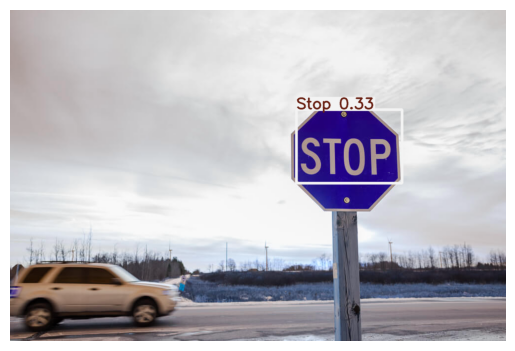

In [ ]:
image_with_detections = results[0].plot()


plt.imshow(image_with_detections)
plt.axis('off')
plt.show()

In [ ]:
!pip install ultralytics opencv-python


import cv2
from ultralytics import YOLO
from google.colab import drive



model = YOLO('/content/drive/MyDrive/TRAFFIC SIGNS/Models/yolov8_trained_v4.pt')

video_path = '/content/drive/MyDrive/TRAFFIC SIGNS/test22.mp4'
cap = cv2.VideoCapture(video_path)

fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))


output_video_path = '/content/drive/MyDrive/test33out2.mp4'
out = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))


while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break


    results = model(frame)


    annotated_frame = results[0].plot()


    out.write(annotated_frame)


cap.release()
out.release()


print(f"Video successfully saved to {output_video_path}")


0: 384x640 (no detections), 11.1ms
Speed: 3.0ms preprocess, 11.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.1ms
Speed: 3.2ms preprocess, 8.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.5ms
Speed: 3.1ms preprocess, 8.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.2ms
Speed: 3.1ms preprocess, 7.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.0ms
Speed: 3.2ms preprocess, 8.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.6ms
Speed: 3.1ms preprocess, 8.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.2ms
Speed: 3.2ms preprocess, 7.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.6ms
Speed: 3.0ms preprocess, 7.6ms inference, 0.6m

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = "/content/drive/MyDrive/LiveVideo.mp4"

# Compressed video path
compressed_path = "/content/drive/MyDrive/LiveVideoComp.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)